# Tidy Data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

### Exercise 1
Attendance Data

Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:

In [4]:
df = pd.read_csv('untidy-data/attendance.csv')
df

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [7]:
#rename first column to name
df.rename(columns={'Unnamed: 0': 'name'}, inplace = True)

In [8]:
df.head()

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [9]:
# get dates into one column called dates
df_melt = pd.melt(df, id_vars='name', var_name='date', value_name='attendance')
df_melt.head()

,name,date,attendance
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


P = 1, A = 0, T = 0.9, H = 0.5

In [12]:
# make series from attendance column
attendance = df_melt.attendance

In [20]:
# replace all the attendances with their appropriate values
attendance_num = attendance.str.replace('P', '1').str.replace('A', '0').str.replace('T', '0.9').str.replace('H', '0.5')

In [21]:
# convert series to float
attendance_num = attendance_num.astype('float')

In [22]:
# check and see 
attendance_num

0     1.0
1     0.0
2     0.0
3     1.0
4     0.9
5     1.0
6     0.9
7     0.9
8     0.9
9     0.9
10    0.0
11    0.5
12    0.5
13    0.9
14    0.0
15    1.0
16    1.0
17    0.9
18    0.5
19    1.0
20    0.0
21    0.9
22    0.9
23    0.9
24    0.9
25    0.0
26    1.0
27    1.0
28    0.9
29    0.9
30    0.9
31    1.0
Name: attendance, dtype: float64

In [23]:
# add attendance num to the dataframe
df_melt['attendance_num'] = attendance_num

In [24]:
df_melt.head()

,name,date,attendance,attendance_num
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9


In [34]:
# use pivot table to aggregate values into mean
df_tidy = pd.pivot_table(df_melt, index='name', values= 'attendance_num', aggfunc='mean')

In [36]:
#rename column to average_atendance
df_tidy.rename(columns={'attendance_num': 'average_attendance'}, inplace = True)

In [37]:
df_tidy

,average_attendance
name,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


### Exercise 2
Coffee Levels

Read the coffee_levels.csv file.
Transform the data so that each carafe is in it's own column.
Is this the best shape for the data?
- This is not the best shape for this data.
- The caraffe is a variable and should be in it's own column
- the way it is originally is a good format

In [38]:
dfc = pd.read_csv('untidy-data/coffee_levels.csv')

In [41]:
dfc.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [44]:
# three types of coffee carafes, x y and z
# 10 of each type
dfc['coffee_carafe'].value_counts()

y    10
x    10
z    10
Name: coffee_carafe, dtype: int64

In [50]:
# use pivot_table to convert each coffee carafe column to it's own column, with the values being coffee amount
dfc_pivot = pd.pivot_table(dfc, index= 'hour', columns = 'coffee_carafe', values= 'coffee_amount')
dfc_pivot.head()

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947


### Exercise 3
Cake Recipes

Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

Tidy the data as necessary.

In [51]:
dfcake = pd.read_csv('untidy-data/cake_recipes.csv')

In [73]:
dfcake

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [74]:
dfcake.shape

(8, 5)

In [ ]:
# Desired columns
# recipe (a b or c), position (bottom, or top), oven degrees, tastiness score

In [80]:
# use str split to split the recipe position column on the : 
# expand=True makes it into two columns
# need two sets of brackets to add two new columns (one is for a list and the other is for notation)
dfcake[['recipe','oven_position']] = dfcake['recipe:position'].str.split(':', expand=True)

In [88]:
#drop the unneeded column
dfcake = dfcake.drop(columns = 'recipe:position')

In [92]:
# use melt to get two seperate columns for cook temp and tastiness score
dfcake_tidy = pd.melt(dfcake, id_vars=['recipe', 'oven_position'], var_name= 'cook_temp', value_name= 'tastiness_score')
dfcake_tidy.head(10)

,recipe,oven_position,cook_temp,tastiness_score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207
5,c,top,225,71.306308
6,d,bottom,225,52.799753
7,d,top,225,96.873178
8,a,bottom,250,53.912627
9,a,top,250,52.009735


#### Which recipe, on average, is the best? recipe b

In [110]:
# groupby the recipe, take agg mean of the tastiness score, sort values from largest to smallest
dfcake_tidy.groupby(dfcake_tidy.recipe).tastiness_score.agg('mean').sort_values(ascending = False)

recipe
b    76.736074
c    75.874748
a    63.922201
d    62.864844
Name: tastiness_score, dtype: float64

#### Which oven temperature, on average, produces the best results? 275

In [124]:
# pivot table to get average tastiness score for each oven cook temp
cook_temp_scores = pd.pivot_table(dfcake_tidy, index= 'cook_temp', values= 'tastiness_score', aggfunc='mean')
cook_temp_scores

,tastiness_score
cook_temp,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


In [125]:
# only pull back the max tastiness_score
cook_temp_scores[cook_temp_scores.tastiness_score == cook_temp_scores.tastiness_score.max()]

,tastiness_score
cook_temp,
275,74.886754


#### Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [114]:
dfcake_tidy.tastiness_score.max()

99.2485405378462

In [117]:
dfcake_tidy.sort_values(by = 'tastiness_score', ascending = False).head(1)

,recipe,oven_position,cook_temp,tastiness_score
26,b,bottom,300,99.248541


<hr style="border-top: 10px groove lime; margin-top: 1px; margin-bottom: 1px"></hr>


## Extra Practice

In [16]:
dfg = pd.read_csv('untidy-data/gapminder2.csv')

In [17]:
dfg.shape

(63, 23)

In [18]:
dfg.head()

,country,life_expect_1955,life_expect_1960,life_expect_1965,life_expect_1970,life_expect_1975,life_expect_1980,life_expect_1985,life_expect_1990,life_expect_1995,...,pop_1960,pop_1965,pop_1970,pop_1975,pop_1980,pop_1985,pop_1990,pop_1995,pop_2000,pop_2005
0,Afghanistan,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,...,9829450,10997885,12430623,14132019,15112149,13796928,14669339,20881480,23898198,29928987
1,Argentina,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,...,20616009,22283100,23962313,26081880,28369799,30675059,33022202,35311049,37497728,39537943
2,Aruba,64.381,66.606,68.336,70.941,71.830,74.116,74.494,74.108,73.011,...,57203,59020,59039,59390,60266,64129,66653,67836,69539,71566
3,Australia,70.330,70.930,71.100,71.930,73.490,74.740,76.320,77.560,78.830,...,10361273,11439384,12660160,13771400,14615900,15788300,17022133,18116171,19164620,20090437
4,Austria,67.480,69.540,70.140,70.630,72.170,73.180,74.940,76.040,77.510,...,7047437,7270889,7467086,7578903,7549433,7559776,7722953,8047433,8113413,8184691


In [20]:
# looks like theres a life expectancy and population column for years between 1955-2005, every 5 years
dfg.columns

Index(['country', 'life_expect_1955', 'life_expect_1960', 'life_expect_1965',
       'life_expect_1970', 'life_expect_1975', 'life_expect_1980',
       'life_expect_1985', 'life_expect_1990', 'life_expect_1995',
       'life_expect_2000', 'life_expect_2005', 'pop_1955', 'pop_1960',
       'pop_1965', 'pop_1970', 'pop_1975', 'pop_1980', 'pop_1985', 'pop_1990',
       'pop_1995', 'pop_2000', 'pop_2005'],
      dtype='object')

In [30]:
# columns goal = country, year, life expectancy, population
life_expect = ['life_expect_1955', 'life_expect_1960', 'life_expect_1965',
       'life_expect_1970', 'life_expect_1975', 'life_expect_1980',
       'life_expect_1985', 'life_expect_1990', 'life_expect_1995',
       'life_expect_2000', 'life_expect_2005']
pop = ['pop_1955', 'pop_1960',
       'pop_1965', 'pop_1970', 'pop_1975', 'pop_1980', 'pop_1985', 'pop_1990',
       'pop_1995', 'pop_2000', 'pop_2005']

In [33]:
# make life expectancy df
df_life = pd.melt(dfg, id_vars='country', value_vars=life_expect, var_name='year', value_name='life_expectancy')
df_life

,country,year,life_expectancy
0,Afghanistan,life_expect_1955,30.332
1,Argentina,life_expect_1955,64.399
2,Aruba,life_expect_1955,64.381
3,Australia,life_expect_1955,70.330
4,Austria,life_expect_1955,67.480
...,...,...,...
688,Switzerland,life_expect_2005,81.701
689,Turkey,life_expect_2005,71.777
690,United Kingdom,life_expect_2005,79.425
691,United States,life_expect_2005,78.242


In [39]:
# clean up year column with year and turn to int
df_life.year = df_life.year.str.replace('life_expect_', '').astype('int')
df_life

,country,year,life_expectancy
0,Afghanistan,1955,30.332
1,Argentina,1955,64.399
2,Aruba,1955,64.381
3,Australia,1955,70.330
4,Austria,1955,67.480
...,...,...,...
688,Switzerland,2005,81.701
689,Turkey,2005,71.777
690,United Kingdom,2005,79.425
691,United States,2005,78.242


In [35]:
# make population df
df_pop = pd.melt(dfg, id_vars='country', value_vars=pop, var_name='year', value_name='population')
df_pop

,country,year,population
0,Afghanistan,pop_1955,8891209
1,Argentina,pop_1955,18927821
2,Aruba,pop_1955,53865
3,Australia,pop_1955,9277087
4,Austria,pop_1955,6946885
...,...,...,...
688,Switzerland,pop_2005,7489370
689,Turkey,pop_2005,69660559
690,United Kingdom,pop_2005,60441457
691,United States,pop_2005,295734134


In [42]:
# clean up year column
df_pop.year = df_pop.year.str.replace('pop_', '').astype('int')

In [43]:
df_pop.head()

,country,year,population
0,Afghanistan,1955,8891209
1,Argentina,1955,18927821
2,Aruba,1955,53865
3,Australia,1955,9277087
4,Austria,1955,6946885


In [44]:
# checking to make sure they're the same shape
df_life.shape, df_pop.shape

((693, 3), (693, 3))

In [50]:
# join dataframes.

dfgm = df_life.merge(df_pop, how='inner', on=['country', 'year'])
dfgm

,country,year,life_expectancy,population
0,Afghanistan,1955,30.332,8891209
1,Argentina,1955,64.399,18927821
2,Aruba,1955,64.381,53865
3,Australia,1955,70.330,9277087
4,Austria,1955,67.480,6946885
...,...,...,...,...
688,Switzerland,2005,81.701,7489370
689,Turkey,2005,71.777,69660559
690,United Kingdom,2005,79.425,60441457
691,United States,2005,78.242,295734134


<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

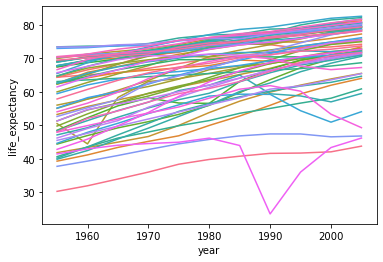

In [57]:
x = dfgm.year
y = dfgm.life_expectancy
sns.lineplot(data=dfgm, x = x, y = y, hue = dfgm.country, legend = False )

In [ ]:
# hmmm what's that big dip with the pink line?

In [63]:
# ahhhhh Rwanda. That must be when the genocide was
# yep. 1994. right in our 1990-1995 window

dfgm[dfgm.life_expectancy == dfgm.life_expectancy.min()]

,country,year,life_expectancy,population
494,Rwanda,1990,23.599,6923738
